# Exploring the dataset

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
# Setting the path to the dataset
import os
from pathlib import Path

print("cwd:", os.getcwd())
p = Path('../data/synthetic_lead_conversion_2000.csv')
print("resolved:", p.resolve())
print("exists:", p.exists())

# more robust: build path relative to the notebook folder (one level up)
data_path = Path.cwd().parent / 'data' / 'synthetic_lead_conversion_2000.csv'
df = pd.read_csv(data_path)

cwd: /Users/rishigarg/Desktop/sepe/data_eda_preprocess
resolved: /Users/rishigarg/Desktop/sepe/data/synthetic_lead_conversion_2000.csv
exists: True


In [7]:
df.head()

,child_age,course_interest,prior_coding_experience,parent_tech_background,demo_attended,demo_feedback_score,response_time_hours,follow_up_calls,ad_source,Living_city,conversion
0,14,Python,1,0,0,NaN,28.32,1,Google,1,1
1,11,Python,1,1,1,5.0,44.39,3,Instagram,0,1
2,15,Python,0,0,0,NaN,5.17,3,Google,1,0
3,13,Python,0,0,0,NaN,32.25,4,Facebook,1,0
4,8,Scratch,0,0,0,NaN,72.88,3,Instagram,0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   child_age                2000 non-null   int64  
 1   course_interest          2000 non-null   object 
 2   prior_coding_experience  2000 non-null   int64  
 3   parent_tech_background   2000 non-null   int64  
 4   demo_attended            2000 non-null   int64  
 5   demo_feedback_score      1008 non-null   float64
 6   response_time_hours      2000 non-null   float64
 7   follow_up_calls          2000 non-null   int64  
 8   ad_source                2000 non-null   object 
 9   Living_city              2000 non-null   int64  
 10  conversion               2000 non-null   int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 172.0+ KB


In [10]:
df.describe()

,child_age,prior_coding_experience,parent_tech_background,demo_attended,demo_feedback_score,response_time_hours,follow_up_calls,Living_city,conversion
count,2000.000000,2000.00000,2000.000000,2000.000000,1008.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,11.590000,0.31300,0.296000,0.504000,3.783730,17.731685,1.704500,0.409500,0.298000
std,2.499405,0.46383,0.456605,0.500109,0.924591,25.397228,1.636312,0.491865,0.457494
min,7.000000,0.00000,0.000000,0.000000,1.000000,0.200000,0.000000,0.000000,0.000000
25%,10.000000,0.00000,0.000000,0.000000,3.000000,4.457500,0.000000,0.000000,0.000000
50%,11.000000,0.00000,0.000000,1.000000,4.000000,9.920000,1.000000,0.000000,0.000000
75%,14.000000,1.00000,1.000000,1.000000,4.000000,20.092500,3.000000,1.000000,1.000000
max,16.000000,1.00000,1.000000,1.000000,5.000000,240.000000,6.000000,1.000000,1.000000


In [12]:
df['conversion'].value_counts(normalize=True)

conversion
0    0.702
1    0.298
Name: proportion, dtype: float64

In [ ]:
# parents tech background vs conversion rate
tech_conv = df.groupby("parent_tech_background")["conversion"].mean()
tech_conv

parent_tech_background
0    0.247869
1    0.417230
Name: conversion, dtype: float64

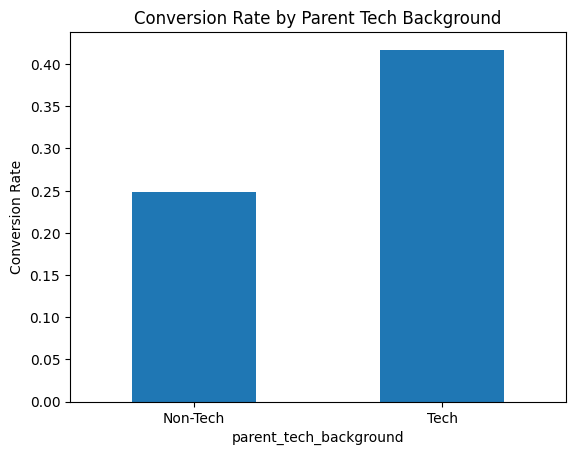

In [15]:
tech_conv.plot(kind="bar")
plt.ylabel("Conversion Rate")
plt.xticks([0,1], ["Non-Tech", "Tech"], rotation=0)
plt.title("Conversion Rate by Parent Tech Background")
plt.show()

In [17]:
# demo class attended vs conversion rate
df.groupby("demo_attended")["conversion"].mean()

demo_attended
0    0.066532
1    0.525794
Name: conversion, dtype: float64

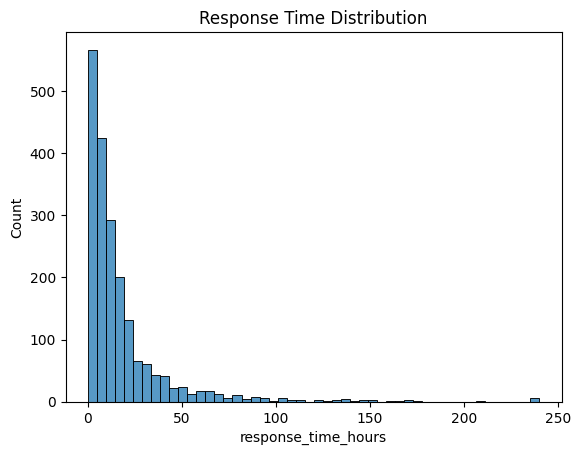

In [22]:
sns.histplot(df["response_time_hours"], bins=50)
plt.title("Response Time Distribution")
plt.show()

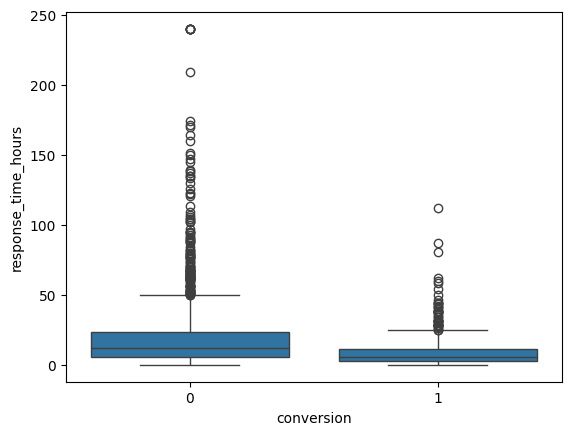

In [23]:
sns.boxplot(x="conversion", y="response_time_hours", data=df)
plt.show()

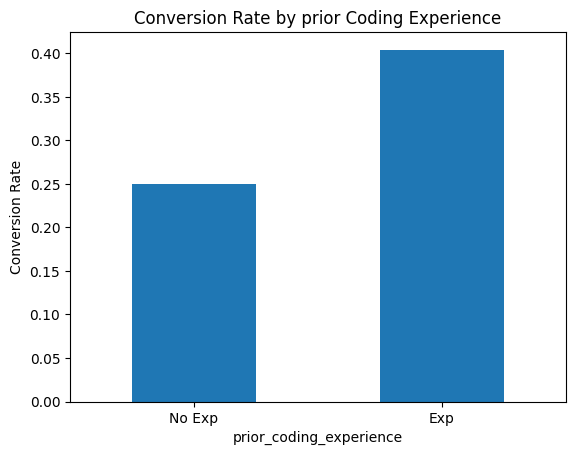

In [25]:
prior_coding_conv = df.groupby("prior_coding_experience")["conversion"].mean()
prior_coding_conv.plot(kind="bar")
plt.ylabel("Conversion Rate")
plt.xticks([0,1], ["No Exp", "Exp"], rotation=0)
plt.title("Conversion Rate by prior Coding Experience")
plt.show()

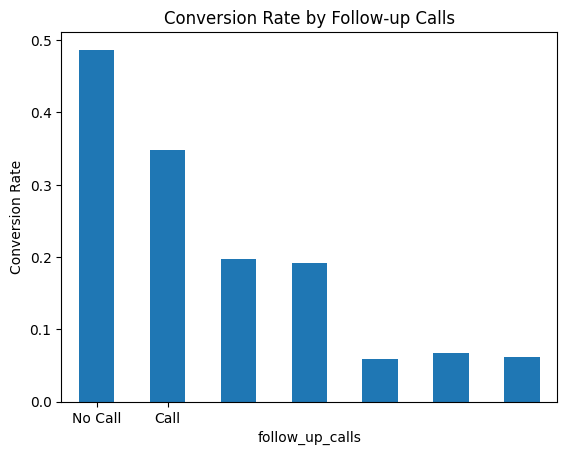

In [26]:
follow_up_calls_conv = df.groupby("follow_up_calls")["conversion"].mean()
follow_up_calls_conv.plot(kind="bar")
plt.ylabel("Conversion Rate")
plt.xticks([0,1], ["No Call", "Call"], rotation=0)
plt.title("Conversion Rate by Follow-up Calls")
plt.show()